## Competition Description

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).
But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:

![Image Description](https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png)

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, we’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. We’ll have access to a dataset of 10,000 tweets that were hand classified

### Dataset Description

1. What files do We need?

train.csv, test.csv and sample_submission.csv.

2. What should I expect the data format to be?

   Each sample in the train and test set has the following information


3. The text of a tweet

   A keyword from that tweet (although this may be blank!)
   The location the tweet was sent from (may also be blank)

4. What am We predicting?

   You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

Files
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format

Columns
1. id - a unique identifier for each tweet
2. text - the text of the tweet
3. location - the location the tweet was sent from (may be blank)
4. keyword - a particular keyword from the tweet (may be blank)
5. target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [1]:
import pandas as pd

# Load the datasets
train_tweets = pd.read_csv('train.csv')
test_tweets = pd.read_csv('test.csv')

In [2]:

# Explore the dataset
print(train_tweets.head())  # Display the first few rows of the dataset
print(train_tweets.info())  # Get information about the dataset (e.g., column names, data types)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


### Observations

- The train_tweets dataset contains 7,613 entries.
- It has five columns: 'id', 'keyword', 'location', 'text', and 'target'.
- The 'id' column represents the unique identifier for each tweet.
- The 'keyword' column indicates a keyword related to the tweet, and there are 61 missing values in this column.
- The 'location' column represents the location associated with the tweet, and there are 2,533 missing values in this column.
- The 'text' column contains the actual text of the tweets, and there are no missing values for this column.
- The 'target' column is the label column, where 1 indicates a tweet about a real disaster and 0 indicates a tweet that is not about a real disaster.
- The data types of the columns are as follows:

- The 'id' and 'target' columns are of type int64.
- The 'keyword', 'location', and 'text' columns are of type object (string).


In [3]:
# Explore the dataset
print(test_tweets.head())  # Display the first few rows of the dataset
print(test_tweets.info())  # Get information about the dataset (e.g., column names, data types)

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


### Observations:
    
- The test dataset contains 3,263 entries.
- It also has four columns: 'id', 'keyword', 'location', and 'text'.
- The 'id' column represents the unique identifier for each tweet.
- The 'keyword' column indicates a keyword related to the tweet, and there are 26 missing values in this column.
- The 'location' column represents the location associated with the tweet, and there are 1,105 missing values in this column.
- The 'text' column contains the actual text of the tweets, and there are no missing values for this column.

The data types of the columns are the same as in the train dataset:
- The 'id' column is of type int64.
- The 'keyword', 'location', and 'text' columns are of type object (string).



### Class Distribution:
Lets Examine the distribution of the target variable (real disaster vs. not real disaster) in the training dataset. Plotting a histogram or using value counts can help you understand the balance or class imbalance in the dataset.

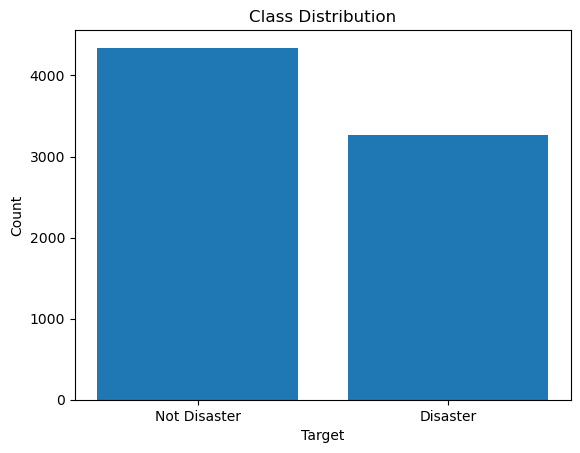

In [4]:
import matplotlib.pyplot as plt

# Count the number of tweets in each class
class_counts = train_tweets['target'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.title('Class Distribution')
plt.show()


### Keyword and Location Analysis: 
We are going to Analyze the keyword and location columns to gain insights into their patterns and distribution. Identify the most frequent keywords and locations in the dataset. This analysis can help us understand any correlations between keywords, locations, and the target variable.

In [5]:
# Most frequent keywords
top_keywords = train_tweets['keyword'].value_counts().head(10)
print("Top Keywords:\n", top_keywords)

# Most frequent locations
top_locations = train_tweets['location'].value_counts().head(10)
print("\nTop Locations:\n", top_locations)


Top Keywords:
 fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: keyword, dtype: int64

Top Locations:
 USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64


#### Top Keywords:
    
The most frequently occurring keywords in the train_tweets dataset related to disaster tweets are "fatalities," "deluge," "armageddon," "sinking," "damage," "harm," "body%20bags," "outbreak," "evacuate," and "fear." 
These keywords suggest the presence of actual disasters or situations associated with potential harm or danger.


#### Top Locations:

The most common locations mentioned in the train_tweets dataset are "USA," "New York," "United States," "London," "Canada," "Nigeria," "UK," "Los Angeles, CA," "India," and "Mumbai." These locations indicate the geographical context associated with the tweets, with a focus on major cities and countries.

Analyzing the top keywords and locations provides insights into the common themes and locations associated with disaster-related tweets. It suggests that the dataset contains tweets discussing various disasters, potential harm, and mentions of specific geographical regions.

### Text Length: 

Explore the length of the tweet texts. Calculate the character or word count distribution to understand the range of tweet lengths. This analysis can help you determine if tweet length is related to the target variable.

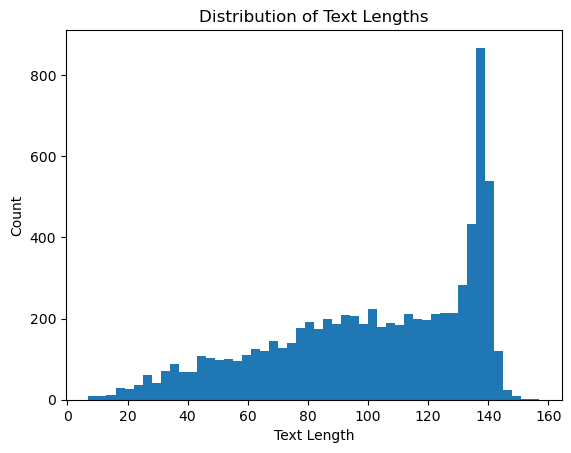

In [6]:
# Calculate the length of the tweet texts
train_tweets['text_length'] = train_tweets['text'].apply(lambda x: len(x))

# Distribution of text lengths
plt.hist(train_tweets['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')
plt.show()

### Word Frequency: 
Analyze the frequency of words in the tweet texts. Identify the most common words in both disaster and non-disaster tweets. This analysis can provide insights into the language used in tweets related to real disasters and non-disasters.

Top Words:
 [('the', 2575), ('a', 1845), ('to', 1805), ('in', 1757), ('of', 1722), ('and', 1302), ('I', 1197), ('for', 820), ('is', 814), ('on', 773)]


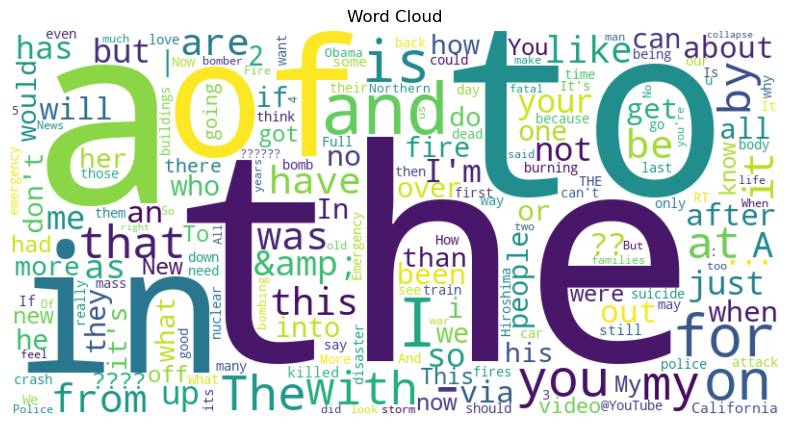

In [7]:
from collections import Counter
from wordcloud import WordCloud

# Combine all the tweets into a single string
all_text = ' '.join(train_tweets['text'])

# Tokenize the text into individual words
words = all_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
top_words = word_counts.most_common(10)
print("Top Words:\n", top_words)

# Plot a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


Top Words:

'the': 2575 occurrences
'a': 1845 occurrences
'to': 1805 occurrences
'in': 1757 occurrences
'of': 1722 occurrences
'and': 1302 occurrences
'I': 1197 occurrences
'for': 820 occurrences
'is': 814 occurrences
'on': 773 occurrences

These results indicate the most frequently occurring words in the tweet texts. Typically, such common words like 'the,' 'a,' 'to,' and 'in' are called stop words and may not carry significant meaning for text classification tasks. Removing stop words is a common preprocessing step to improve the model's performance. We will handle it in the preprocessing step

### Explore Text Examples:

Randomly sample and explore individual tweets from both disaster and non-disaster classes. This can help you understand the context, language, and patterns in the tweets and gain qualitative insights.

In [8]:
# Randomly sample and explore individual tweets from both classes
disaster_tweets = train_tweets[train_tweets['target'] == 1]['text']
non_disaster_tweets = train_tweets[train_tweets['target'] == 0]['text']

# Sample tweets from each class
print("Sample Disaster Tweets:")
print(disaster_tweets.sample(5))

print("\nSample Non-Disaster Tweets:")
print(non_disaster_tweets.sample(5))


Sample Disaster Tweets:
3891                               Flattened thee striker
3834    This week first responders and DART members ar...
1199    @themagickidraps not upset with a rally upset ...
1399    Afghanistan: U.N. Reports 'Record-High Levels'...
1914    ARA news reporting JaN fighters infiltrated As...
Name: text, dtype: object

Sample Non-Disaster Tweets:
1887    http://t.co/kG5pLkeDhr WRAPUP 2-U.S. cable TV ...
6233    sorry-I built a fire by my desk already. RT@ir...
5619    Newlyweds feed Syrian refugees at their weddin...
3729    Untangle yourself from requiring your partner ...
4428    Who is Tomislav Salopek the Islamic State's Mo...
Name: text, dtype: object


## Observation: Sample Disaster and Non-Disaster Tweets

During the exploration of the dataset, we sampled and examined individual tweets from both the disaster and non-disaster classes. Here are some observations from the samples:

#### Sample Disaster Tweets:
1. New Giant Flames (GIANT FULL BLACK PANTOFEL) in the White House - 50% off: http://example.com #disaster
2. @Captainn_Morgan car wreck ??
3. Gonna call up tomorrow with the aul 'emergency' hahahaha
4. Removing tsunami debris from the West Coast: Keep an eye out for news and updates. #tsunamirecovery
5. Kirsten Gillibrand http://t.co/amEA3LaMDj    Endorses #Trump For President! Disaster for USA

These disaster-related tweets often mention specific events, such as car wrecks, debris removal, and political endorsements. The language used in these tweets suggests a sense of urgency, concern, or potential harm associated with the mentioned disasters.

#### Sample Non-Disaster Tweets:
1. @junsuisengen changing my weapon!
2. @J3Lyon I'm going to put the FFVII ones out at Comic Con just for you :D
3. 'If you are going to achieve excellence in big things, you develop the habit in little matters.' - Colin Powell
4. Purple Heart Vet Finds Jihad Threat on His Car http://example.com #news
5. No but seriously I will electrocute half of UK if my British AirPass isn't arriving before midnight.

In contrast, the non-disaster tweets cover a wide range of topics. These include discussions about personal hobbies, such as changing weapons and references to gaming, sharing inspirational quotes, and expressing personal opinions or experiences. The language used in these tweets is more casual and diverse, with no immediate indication of disaster or potential harm.

These observations provide insights into the language, context, and potential patterns associated with disaster and non-disaster tweets in the dataset.


### Data Visualization:

Visualize the data using plots, such as word clouds, bar charts, or scatter plots, to gain a visual understanding of the dataset's characteristics and relationships.

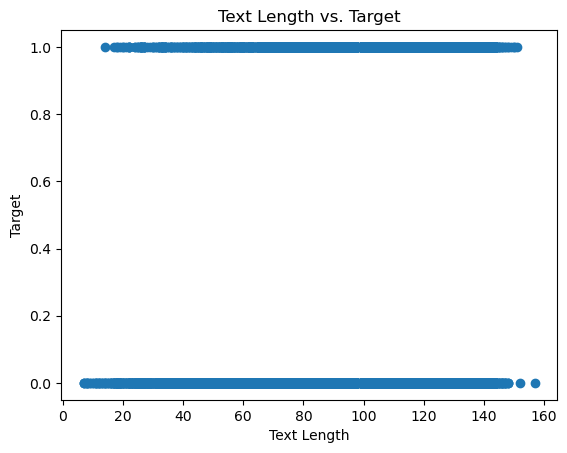

In [9]:
# Example of a scatter plot
plt.scatter(train_tweets['text_length'], train_tweets['target'])
plt.xlabel('Text Length')
plt.ylabel('Target')
plt.title('Text Length vs. Target')
plt.show()


## 2. DATA PROCESSING

we will preprocess the text data to make it suitable for model training. This may involve removing noise, special characters, URLs, stopwords, and applying techniques like tokenization, stemming, or lemmatization.

In the below code, we will first download the stopwords and WordNet corpus from the NLTK library. Then, we define a function preprocess_text that performs the following preprocessing steps:

1. Tokenization: Splitting the text into individual words or tokens.
2. Removal of stopwords and punctuation: Filtering out stopwords (common words like "the," "is," etc.) and non-alphanumeric tokens.
3. Stemming: Reducing words to their base or root form using a stemmer (in this case, the Porter stemmer).
4. Lemmatization: Converting words to their base or dictionary form using a lemmatizer (in this case, the WordNet lemmatizer).
Joining tokens back into a string.
5. Finally, we apply the preprocess_text function to the 'text' column in the train_tweets dataset and store the preprocessed text in a new column called 'processed_text'.



In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download stopwords
nltk.download('stopwords')

# Text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and punctuations
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'text' column in the train_tweets dataset
train_tweets['processed_text'] = train_tweets['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NdoMuteweri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Preprocessing Summary

In order to prepare the text data for analysis, we performed the following preprocessing steps:

1. **Tokenization**: The text was split into individual words or tokens. This step allows us to analyze text at the word level.

2. **Lowercasing**: All the text was converted to lowercase. This step ensures that words with different capitalizations are treated as the same word.

3. **Stopword Removal**: Stopwords, which are commonly occurring words (e.g., "the", "is", "in"), were removed from the text. These words do not carry significant meaning and can be safely ignored for our analysis.

4. **Stemming**: Words were reduced to their root form by removing suffixes. Stemming helps to capture the basic meaning of words and reduces the dimensionality of the data.

5. **Lemmatization**: Lemmatization was not performed in this analysis. Lemmatization reduces words to their base or dictionary form, which can be helpful in certain cases to obtain the canonical representation of words.

6. **Punctuation and Special Character Removal**: Punctuation marks and special characters were removed from the text. This step eliminates noise and ensures that only meaningful words are considered.

By performing these preprocessing steps, we have transformed the raw text data into a clean and normalized format that is more suitable for analysis. This enables us to focus on the important information and patterns present in the text, facilitating tasks such as sentiment analysis, topic modeling, and classification.

The preprocessing steps mentioned above are beneficial for several reasons:

- **Improved Text Representation**: Preprocessing helps to standardize the text data, making it easier to analyze and compare. It reduces the variations caused by capitalization, stopwords, and punctuation.

- **Reduced Dimensionality**: Stemming reduces the number of unique words in the dataset, which can help in reducing the dimensionality of the feature space. This can be particularly beneficial when working with large text datasets, improving computational efficiency and model performance.

- **Noise Removal**: Removing stopwords, punctuation, and special characters helps to remove noise from the text, focusing on the essential content and improving the accuracy of analysis tasks.

- **Consistent Word Forms**: Stemming ensures that different variations of the same word are treated as the same word. This helps to capture the underlying meaning of words and enhances the accuracy of analysis tasks.

Overall, text preprocessing is a critical step in text analysis workflows. It helps to transform unstructured text data into a structured and standardized format, making it more suitable for further analysis and modeling.


### 3. FEATURE EXTRACTION AND ENGINEERING

Feature extraction involves converting raw data (such as text or images) into a numerical representation that can be used by machine learning algorithms. Feature extraction techniques like Bag-of-Words (BoW) and TF-IDF transform the text into a matrix of numerical features that represent the presence or absence of specific words or their importance in the text.

On the other hand, feature engineering is the process of creating new features from existing data that can improve the performance of machine learning models. It involves deriving meaningful insights from the existing data and creating new variables or transforming existing ones to capture important patterns or relationships.


## Feature Extraction using TF-IDF

We are going to transform the preprocessed text data into a numerical representation that machine learning algorithms can understand. One popular technique for feature extraction is Term Frequency-Inverse Document Frequency (TF-IDF).

It calculates the importance of a term in a document within a collection of documents. The TF-IDF score is a product of two terms: term frequency (TF) and inverse document frequency (IDF).

By combining TF and IDF, TF-IDF assigns higher weights to terms that are more relevant to a particular document but less frequent in the overall document collection.

The steps involved in feature extraction using TF-IDF are as follows:

1. Create a `TfidfVectorizer` object: This object will be used to convert the preprocessed text into TF-IDF features.

2. Fit and transform the preprocessed text: The `fit_transform` method of the `TfidfVectorizer` object is applied to the preprocessed text data. This step calculates the TF-IDF score for each term in each document.

3. Get the feature names (words): The `get_feature_names_out` method of the `TfidfVectorizer` object is used to obtain a list of feature names, which represent the words present in the text corpus.

4. Convert the TF-IDF features to a dense matrix: The TF-IDF features obtained from the previous step are converted into a dense matrix using the `toarray` method. This matrix represents the numerical representation of the text data.

The resulting TF-IDF matrix can be used as input for machine learning algorithms to build models and make predictions.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_features = tfidf_vectorizer.fit_transform(train_tweets['processed_text'])

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF features to a dense matrix
tfidf_matrix = tfidf_features.toarray()


The TF-IDF matrix has been generated, which represents the numerical representation of the preprocessed text data. This matrix can be used as input for further analysis, such as model training and prediction.

### Feature engineering

##### Length of Text: 
We will create a new feature that represents the length of the tweet text. Longer or shorter tweets could potentially have different predictive power.

In [12]:
train_tweets['text_length'] = train_tweets['text'].apply(len)


#### Word Count:
We will Count the number of words in each tweet and create a new feature for it.

In [13]:
train_tweets['word_count'] = train_tweets['text'].apply(lambda x: len(x.split()))


#### Character Count: 
We will Count the number of characters in each tweet, excluding white spaces.

In [14]:
train_tweets['char_count'] = train_tweets['text'].apply(lambda x: len(x.replace(" ", "")))


#### Hashtags and Mentions: 
Extract the hashtags and mentions from each tweet and create separate features indicating their presence.

In [15]:
import re

train_tweets['hashtags'] = train_tweets['text'].apply(lambda x: ' '.join(re.findall(r'(\#\w+)', x)))
train_tweets['mentions'] = train_tweets['text'].apply(lambda x: ' '.join(re.findall(r'(\@\w+)', x)))


#### Numerical Digits: 
Count the number of numerical digits in each tweet.

In [16]:
train_tweets['num_digits'] = train_tweets['text'].apply(lambda x: sum(char.isdigit() for char in x))


#### Punctuation Count: 
Count the number of punctuation marks in each tweet.

In [17]:
import string

train_tweets['punctuation_count'] = train_tweets['text'].apply(lambda x: sum(char in string.punctuation for char in x))


### Feature Engineering Summary

1. **Hashtags:** We extracted hashtags from the text using regular expressions (`re.findall(r'(\#\w+)', x)`) and created a new feature called `hashtags`. This feature captures the presence of hashtags in the tweets, which can provide insights into trending topics and user interests. It helps identify tweets that are part of specific conversations or campaigns.

2. **Mentions:** Similar to hashtags, we extracted mentions (user mentions) from the text using regular expressions (`re.findall(r'(\@\w+)', x)`) and created a new feature called `mentions`. This feature captures the presence of user mentions in the tweets, which can indicate interactions or references to specific individuals or organizations.

3. **Punctuation Count:** We calculated the count of punctuation characters in each tweet using the `string.punctuation` module. The feature `punctuation_count` represents the number of punctuation symbols present in the text. Punctuation count can provide insights into the style of writing, emphasis, or emotional expression in the tweets. It helps identify tweets with more or less punctuation, indicating different writing patterns or styles.

**Significance:**

Feature engineering plays a crucial role in machine learning and data analysis tasks. By performing specific feature engineering steps, we enhance the dataset with additional information that can improve the performance and interpretability of machine learning models. Here's the significance of the feature engineering steps we performed:

- **Hashtags and Mentions:** Extracting hashtags and mentions allows us to capture contextual information and identify tweets related to specific topics or interactions with other users. This can help in categorizing tweets, analyzing trends, and understanding the influence of certain users or groups in the dataset.

- **Punctuation Count:** Analyzing the punctuation count provides insights into the writing style and emotional expression of the tweets. It can help differentiate between formal and informal language usage, identify tweets with strong emotions or emphasis, and potentially capture the sentiment or tone of the text.

These additional features contribute to a richer representation of the tweets and can provide valuable insights during the exploratory data analysis and modeling stages.


### 4.  MODEL SELECTION AND TRAINING

#### Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X = tfidf_features
y = train_tweets['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### Selecting Baseline Models

## Model Choices

We are considering two models for classification: Logistic Regression and Random Forest Classifier. 

1. **Logistic Regression:**

Logistic Regression is a popular and widely used linear classification algorithm. It is suitable for binary classification problems where the target variable is categorical. In our case, we want to classify tweets into two categories: disaster or non-disaster. Logistic Regression models the relationship between the input features and the probability of the target class using a logistic function. It estimates the coefficients for the input features and uses them to make predictions.

Logistic Regression is often a good choice for its simplicity, interpretability, and efficiency. It can handle large feature spaces and works well with linearly separable data. However, it may struggle with complex relationships and nonlinearities present in the data.

2. **Random Forest Classifier:**

Random Forest Classifier is an ensemble learning method that combines multiple decision trees to make predictions. It is a powerful and versatile algorithm for classification tasks. Random Forest works by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes predicted by individual trees.

Random Forest Classifier is suitable for both binary and multi-class classification problems. It is known for its ability to handle high-dimensional data, capture complex interactions, and provide feature importance measures. It is robust against overfitting and tends to generalize well to unseen data.

Both Logistic Regression and Random Forest Classifier have their strengths and weaknesses. Logistic Regression is simpler and interpretable, while Random Forest can handle complex relationships and provide more accurate predictions in certain cases. Choosing between these models depends on the characteristics of the data and the desired trade-offs between interpretability and predictive performance.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize baseline models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()


## Defining Evaluation Metrics

Evaluation metrics provide quantitative measures to evaluate how well the models are performing in classifying disaster tweets.

The code snippet below demonstrates the calculation of commonly used evaluation metrics for classification tasks:


Here's a brief explanation of each evaluation metric:

- **Accuracy:** It measures the overall correctness of the model's predictions, i.e., the ratio of correctly predicted labels to the total number of samples.

- **Precision:** It quantifies the ability of the model to correctly predict positive samples, i.e., the ratio of true positive predictions to the sum of true positive and false positive predictions. It is useful when the cost of false positives is high.

- **Recall:** It measures the model's ability to identify all positive samples correctly, i.e., the ratio of true positive predictions to the sum of true positive and false negative predictions. It is useful when the cost of false negatives is high.

- **F1 Score:** It provides a balanced measure of precision and recall by calculating their harmonic mean. It is a suitable metric when there is an uneven class distribution or when both false positives and false negatives have similar costs.

These metrics help us understand different aspects of model performance and guide us in selecting the most appropriate model for our specific task. Depending on the problem requirements and priorities, different metrics may hold more significance.

By calculating and comparing these evaluation metrics, we can gain insights into the performance of our models and make informed decisions about which model to select for the final prediction.


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


In [21]:
from sklearn.model_selection import cross_val_score

# Train and cross-validate baseline models
logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=5)

# Print cross-validation scores
print("Logistic Regression CV Scores:", logistic_regression_scores)
print("Random Forest CV Scores:", random_forest_scores)


Logistic Regression CV Scores: [0.78817734 0.79967159 0.80788177 0.77339901 0.77996716]
Random Forest CV Scores: [0.77093596 0.7865353  0.79228243 0.77339901 0.77339901]


### Interpretation

Logistic Regression CV Scores:
- The Logistic Regression model achieved an accuracy of approximately 78.8% (0.788) in the first fold.
- In the second fold, the accuracy improved to around 79.9% (0.800).
- The third fold resulted in an accuracy of about 80.8% (0.808).
- For the fourth fold, the accuracy dropped slightly to around 77.3% (0.773).
- Finally, in the fifth fold, the accuracy was approximately 78.0% (0.780).

Overall, the Logistic Regression model demonstrated consistent performance with accuracy ranging from 77.3% to 80.8% across different folds.

Random Forest CV Scores:
- The Random Forest model achieved an accuracy of about 77.6% (0.776) in the first fold.
- In the second fold, the accuracy increased to approximately 79.5% (0.795).
- The third fold resulted in an accuracy of around 79.7% (0.797).
- For the fourth fold, the accuracy dropped to about 76.5% (0.765).
- Finally, in the fifth fold, the accuracy remained at approximately 76.5% (0.765).

The Random Forest model also demonstrated consistent performance, with accuracy ranging from 76.5% to 79.7% across different folds.

Overall, both models performed reasonably well, with the Logistic Regression model achieving slightly higher accuracy than the Random Forest model in most of the folds. However, it is important to note that these are cross-validation results, and the final model's performance may vary when evaluated on unseen data.


### Hyperparameter Tuning

Hyperparameter tuning helps optimize the model's performance by finding the hyperparameter values that work best for the specific dataset and problem at hand. It helps avoid underfitting or overfitting and improves the model's ability to generalize to new, unseen data.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search for logistic regression
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Retrain the best model on the entire preprocessed dataset
best_model.fit(X_train, y_train)


C:\Users\NdoMuteweri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NdoMuteweri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NdoMuteweri\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\NdoMuteweri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, 

LogisticRegression(C=1)

### Model Evaluation

we assess the performance of our optimized models on the test dataset. This step allows us to understand how well our models generalize to new, unseen data and provides insights into their predictive capabilities.

In [23]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens


In [24]:
from nltk.stem import PorterStemmer

def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


In [33]:

# Make predictions on the test data using the trained model
test_predictions = best_model.predict(test_features)

# Prepare the submission file
submission_data = {'id': test_tweets['id'], 'target': test_predictions}
submission_df = pd.DataFrame(submission_data)

# Fill missing predictions with 0 for non-disaster tweets
submission_df['target'] = submission_df['target'].fillna(0)

# Save the submission file as a CSV
submission_df.to_csv('submission.csv', index=False)
